<a href="https://colab.research.google.com/github/jtlee-97/Machine-Learning-with-Python/blob/main/%5B04%5D_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **데이터 전처리**
      데이터 전처리 과정은 데이터를 분석에 좋게 고치는 작업을 말한다.

      데이터 사이언스, 머신러닝 등의 과정에서 가장 중요하고 시간이 많이 소요되는 단계이다.
      좋은 머신러닝 모델을 구축하는데 도움이 되는 핵심적인 전처리 기법을 알아본다.

      [핵심적 전처리 기법 3가지]
      1. 누락된 값 제거 및 대체
      2. 범주형 데이터 변환
      3. 모델과 관련이 높은 특성 선택

### 준비

In [ ]:
# 사이킷런 최신버전
!pip install --upgrade scikit-learn

In [ ]:
# 참고자료 이미지 출력용
from IPython.display import Image

In [ ]:
# "[03] 특성나누기"부터 사용될 데이터 셋 준비
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# UCI 머신러닝 저장소의 Wine 데이터셋에 접근되지 않을 때
# 다음 코드의 주석을 제거하고 로컬 경로에서 데이터셋을 읽으세요:

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# [03] 특성나누기 부터 사용될 와인 데이터셋에 대한 훈련셋/테스트셋 구분 처리
# 30% 테스트 데이터 | 70% 훈련 데이터
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

---
### [01] **누락된 데이터 다루기**

      
      

#### [01-01] 테이블 형태 데이터 내 누락된 값 식별 방법

In [ ]:
# 예제 데이터 셋을 생성
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''      # 중간중간 비어있는 누락된 데이터를 추가한 테이블 형 데이터셋
                        # pandas에서의 null은 Not a Number의 줄임말인 NaN으로 표기한다

df = pd.read_csv(StringIO(csv_data))    
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


      
      read_csv함수를 통해서 csv 포맷의 데이터를 판다스 DataFrame으로 읽어드리는데, 
      StringIO함수를 통해 하드 디스크의 일반 csv파일처럼 csv_data에 저장된 문자열을 읽어 Pandas DataFrame으로 변환할 수 있다.

      데이터 전처리를 하는데 Pandas의 DataFrame을 사용하는 것이 훨씬 편하다.

      ☑ csv 파일형식은 comma-separated values의 줄임말로 콤마로 구분한 텍스트 데이터/파일형식이다.

In [ ]:
# True/False로 누락값을 찾아주는 isnull()함수
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

#### [01-02] 누락 값이 있는 훈련 샘플이나 특성을 제외하는 법


        

#### **dropna 메서드**
        누락 데이터를 다룰 때 가장 쉬운 방법은 "데이터 셋에서 해당 훈련 샘플(행)이나 특성(열)을 완전히 삭제" 하는 것이다.

        누락된 값이 있는 행은 dropna 메서드를 통해 삭제가 가능하다.
        axis=0 : 행에 따라서 동작
        axis=1 : 열에 따라서 동작

In [ ]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


        [dropna]메서드의 편리한 매개변수

In [ ]:
# 모든 열이 NaN일 때만 행을 삭제
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
# NaN이 아닌 값이 N개보다 작은 행을 삭제
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
# 특정 열에 NaN이 있는 행만 삭제함.
df.dropna(subset=['C']) # C열에 NaN이 있는 행을 삭제함

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


        이러한 방식은 편리하고 간단하지만 너무 많은 데이터 손실이 있으며, 안정된 분석을 불가능으로 유도한다.
        또한 많은 특성(열)을 제거하면 분류기의 구분에 중요한 정보를 잃어 버릴 위험도 있다.

#### **Interpolation(보간) 기법**

      가장 널리 쓰이는 누락 값 기법으로 보간 기법에도 여러가지 기법이 존재한다.

      1. SimpleImputer
      2. IterativeImputer
      3. KNNImputer
      4. fillna()

##### **[SimpleImputer]**
          SimpleImputer는 missing value를 특정한 값으로 채우는 역할을 한다.
          같은 기능으로 Pandas의 fillna()가 있다. (4번째 소개)

In [ ]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

        결과를 보면 missing value를 해당 특성인 열에서 평균 값으로 계산되어 채워진 것을 볼 수 있다.
        이는 strategy = 'mean'으로 설정했기 때문인데, 해당 매개변수의 옵션은 다음과 같다.
        - mean : 평균 값
        - median : 중간 값 (순서대로 나열할 때 중간에 위치한 값)
        - most_frequent : 가장 많이 나온 값
        - constant : 지정 값

        
        SimpleImputer 클래스의 missing_values 매개변수는 missingValue에 대한 설정인데, 현재 빈자리가 NaN이기에 np.nan으로 설정되었다.
        
        

        또한 SimpleImputer에는 axis 매개변수가 없다. 기본 동작방식이 axis=0이기 때문이다.
        그럼 행열변환의 결과를 원할 때는 어떻게 해야하는지 하단 코드를 통해 확인한다.

In [ ]:
from sklearn.preprocessing import FunctionTransformer

ftr_imr = FunctionTransformer(lambda X: imr.fit_transform(X.T).T)
imputed_data = ftr_imr.fit_transform(df.values)
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [10.        , 11.        , 12.        , 11.        ]])

      SimpleImputer의 add_indicator 매개변수를 통해 missing value에 대한 위치 정보를 추가한 배열을 반환 받을 수 있다. 

In [ ]:
imr = SimpleImputer(add_indicator=True)
imputed_data = imr.fit_transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ,  0. ,  0. ],
       [ 5. ,  6. ,  7.5,  8. ,  1. ,  0. ],
       [10. , 11. , 12. ,  6. ,  0. ,  1. ]])

        사이킷런 ver 0.24 부터는 원본 특성으로 변환하는 inverse_transform 메서드가 추가되었다.
      

In [ ]:
imr.inverse_transform(imputed_data)

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

##### **[IterativeImputer]**
          (Iterative : 반복적인, 반복의)
          IterativeImputer는 한 특성의 통계 값을 통해 값을 채우는 SimpleImputer와 다르게 다른 특성을 이용해서 값을 채우는 방식이다.

          Round-robin 형식(기회를 동등하게 갖는 방식)을 통해 iteration하며, 회귀분석을 통해 missing value를 예측하는 방식이다.

          max_iter과 random_state를 통해 파라미터를 줄 수도 있다.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iimr = IterativeImputer()
iimr.fit_transform(df.values)

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  7.00047063,  8.        ],
       [10.        , 11.        , 12.        , 12.99964527]])

##### **[KKNImputer]**
          K-최근접 이웃 방식을 통한 missing value를 채우는 방식이다.
          최근접 이웃의 개수는 n_neighbors 매개변수를 통해 지정 (기본값 5)
          

In [ ]:
from sklearn.impute import KNNImputer

kimr = KNNImputer()
kimr.fit_transform(df.values)

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

##### **[Pandas - fullna()]**
          Pandas의 fullna() 메서드에 매개변수로 missing value를 채울 방법을 전달하는 방식이 더 간단하다.
          

In [ ]:
df.fillna(df.mean()) # 중간값으로 missing value를 채움

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [ ]:
df.fillna(method='bfill') # backfill도 동일한 표현 : missing value를 다음 행의 값으로 채움

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,12.0,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
df.fillna(method='ffill') # pad와 동일한 표현 : missing value를 이전 행의 값으로 채움

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,3.0,8.0
2,10.0,11.0,12.0,8.0


In [ ]:
df.fillna(method='ffill', axis=1) # axis 지정이 가능하다

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,6.0,8.0
2,10.0,11.0,12.0,12.0


#### 사이킷런 추청기 API의 방식
        이처럼 사이킷런의 추정기/변환기의 변환 방식은 다음과 같다

In [ ]:
# 사이킷런 변환기의 훈련 및 변환 과정
Image(url='https://git.io/Jtmwv', width=400) 

In [ ]:
# 사이킷런 추정기의 훈련과 예측 과정
Image(url='https://git.io/JtYZW', width=300) 

---
### [02] **범주형 데이터 다루기**

      
      

      수치형 데이터가 아닌 실제 데이터셋과 같은 범주형 데이터인 경우의 경우를 다룬다.
      
      범주형 데이터에서는 "순서가 있는"과 "순서가 없는"이 중요하다.
      예를 들면 티셔츠에 대한 데이터에서 
          사이즈 : XL > L > M : 순서가 있음
          색 상 : red / blue / green : 순서가 없음
      을 보면 사이즈와 색상이라는 두개의 특성 내 데이터에 순서가 있는 특성이 있고, 없는 특성이 있다.

In [ ]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


#### **[순서가 있는 특성 데이터 다루기]**
      순서가 있는 특성에 대해서는 매핑하는데 어려움이 없다.
      단 범주형 문자열 값을 정수로 바꿔 판단 시키는 것만 해주면 된다. (매핑을 이용)

In [ ]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


        만약 다시 원상복구 하고 싶다면 거꾸로 매핑시키면 된다.
        ☑ 하단 코드 : 거꾸로 매핑하는 딕셔너리를 정의 및 정의

In [ ]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

        ✅ 딕셔너리 내포
          : {키:값 for 키, 값 in 딕셔너리}
          : 위에 적용된 딕셔너리 내포는 키와 값의 위치를 변경하도록 구현됨 {값:키 for 키, 값 in 딕셔너리}

#### **[순서가 없는 특성 데이터 다루기]**
      순서가 없는 특성에 대해서는 매핑하는데는 조금 곤란하다.
      물론 문자열 레이블을 정수로 인코딩하는 LabelEncoder()이나, 범주형 데이터를 정수로 인코딩하는 OrdinalEncoder()를 통해 순서를 매핑할 수는 있다.

      하지만 이는 색상에 크고 작은 기준을 지정하는 것과 같이 옳지 않은 결과가 생긴다.
      순서가 없는 특성에 size를 부여하게 되면 모델 분류에 있어서 오류가 생기거나 잘못될 수 있기 때문이다.

      이때 사용하는 방식이 OneHot 인코딩 방식이다.
      원-핫 인코딩 방식은 순서없는 특성에 들어있는 고유 값마다 새로운 데이터 특성을 만드는 방식이다.

      예를 들어 R, G, B 3개의 순서없는 특성의 값이라면,
      R = R:1 | G:0 | B:0
      G = R:0 | G:1 | B:0
      B = R:0 | G:0 | B:1    이런식으로 새로운 특성을 만드는 것이다.

In [ ]:
df.values

array([['green', 1, 10.1, 'class2'],
       ['red', 2, 13.5, 'class1'],
       ['blue', 3, 15.3, 'class2']], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values # 3개의 특성만 가져옴
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:,0].reshape(-1,1)).toarray()  # 하나의 열만 적용했음(color열만 적용할 것이기 때문)

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(), [0]), 
                               ('nothing', 'passthrough', [1, 2])]) 
c_transf.fit_transform(X)

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

        ColumnTransformer를 통해 (name, transformer, column(s))를 받는다.
        여기서                                              
            [0] : color 특성에는 onehot을 적용하고,
            [1,2] : size, price 열에는 nothing/passthrough를 통해 적용시키지 않은 것을 볼 수 있다. (첫 번째 color 열만 변환하기 위해서) 

        [ColumnTransformer 클래스]
        Pandas DataFrame의 열마다 다른 변환을 적용하도록 도와준다.
        (from sklearn.compose import make_column_transformer와 비슷하다)

         array로 작동하며, 인스턴스에 변수들을 저장하기 때문에 새로운 데이터셋을 마주해도 똑같은 차원으로 가공을 할 수 있다.

         리스트 내 튜플로 구성이된다.
         ColumnTransformer([ (이름, 변환기 객체, 객체가 적용될 열) ])

      기본 방식은 이러하지만 Pandas에서는 더 편리한 방법을 제공한다.
      바로 get_dummies 메서드를 사용하는 것인데, DataFrame에 적용하게 되면 이는 문자열 열만 반환하고, 나머지 열은 그대로 두게 된다.
      여기서는 price/size는 숫자라서 그대로 두고, color값은 문자열이기 때문에 color 열만 적용시켜지는 것을 볼 수 있다.

In [ ]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


      기본 동작방식은 문자열 기준으로 동작하지만 get_dummies 메서드에서 columns 매개변수를 이용하면 변환하려는 특성을 구체적으로 지정할 수 있다.

In [ ]:
pd.get_dummies(df[['price', 'color', 'size']], columns=['size'])

,price,color,size_1,size_2,size_3
0,10.1,green,1,0,0
1,13.5,red,0,1,0
2,15.3,blue,0,0,1


In [ ]:
pd.get_dummies(df[['price', 'color', 'size']], columns=['size', 'price'])

,color,size_1,size_2,size_3,price_10.1,price_13.5,price_15.3
0,green,1,0,0,1,0,0
1,red,0,1,0,0,1,0
2,blue,0,0,1,0,0,1


##### **다중 공선성 문제와 OneHot 인코딩**
        이 때 가변수 중 하나를 drop하지 않으면 독립 변수간 종속성이 발생한다. 

        독립 변수간 상관관계가 나타나는 문제(다른 변수에 의존성이 있는 문제)를 다중공선성(Multicollinearity)이라고 한다.

        범주형 데이터를 가변수화 했을 때 다중공선성이 발생하므로 이를 해결하기 위해 하나의 변수를 drop 하는 것이다. 

In [ ]:
# get_dummies 다중공선성 해결방법
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [ ]:
# One-Hot Encoder 다중공선성 해결방법
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([ ('onehot', color_ohe, [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X)

array([[1.0, 0.0, 1, 10.1],
       [0.0, 1.0, 2, 13.5],
       [0.0, 0.0, 3, 15.3]], dtype=object)

🤪 하지만 sklearn에서는 이런 다중공선성 문제를 잘 해결하도록 지원해주기 때문에 이렇게 수동으로 다중 공선성 해결을 위해 열을 삭제하는 일은 거의 없을 것이다.

##### **(추가내용) 순서가 있는 특성의 특성 인코딩**
        순서가 있는 특성이지만 명확하게 수치적 크기에 확신이 없는 경우나 두 범주 사이의 순서를 정의할 수 없는 경우라면 임계값 0|1을 통해서 나눌 수 있다.
      

In [ ]:
# 데이터셋 생성
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


        해당 데이터셋의 size특성에 대해서 적용시킬 것이다.
        size에 대한 새로운 특성을 만들 수 있는데, 다음과 같이 x가 M보다 크다 / x가 L보다 크다로 나누어 새로운 특성을 적용시키는 방법이다.

        'x > M' | 'x > L'

In [ ]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)

del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


        위처럼 임계 값을 기준으로 특성을 인코딩하는 lambda 함수를 pandas의 apply 메서드로 적용시킨 모습을 볼 수 있다.

---
### [03] **특성 다루기**

      
      

      ✅ 스케일 : 특성이 가지고 있는 값의 범위
      
      결정트리/랜덤포레스트는 특성스케일 조정에 대해서 걱정할 필요가 없는 몇 없는 머신러닝 알고리즘이다.
      하지만 대부분의 알고리즘들은 특성스케일이 같을 때 가장 좋은 성능을 보이는 경우가 대부분이다.

      예시로 두개의 특성에서 첫번째 특성이 1-10의 스케일을 가지고, 두번째 특성이 1-10만의 스케일을 가진다고 들자.
      아달린 알고리즘에서 제곱 오차 함수를 생각한다면, 대부분 두번째 특성에 대한 큰 오차에 맞춰 가중치를 최적화하게 될 것이다.

      그만큼 특성스케일 조정작업은 머신러닝에 있어서 중요한 전처리 작업이다.

['mean perimeter' 'mean area']


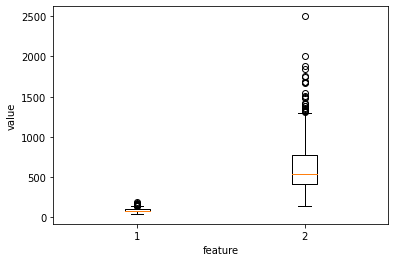

In [ ]:
# sklearn에서 제공하는 유방암 데이터를 통해 박스플롯을 통해 스케일을 비교해보자
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
xc = cancer.data
yc = cancer.target
xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, stratify = yc, test_size = 0.2, random_state = 42)

import matplotlib.pyplot as plt
print(cancer.feature_names[[2,3]])
plt.boxplot(xc_train[:,2:4])         # 여기서 x_train[:,2:4]는 x_train데이터에서 전체 중 2번째 3번째 열이라는 뜻이다. (배열의 일부분, 부분집합을 선택하는 방법이다)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

        위 그래프처럼 index:2 특성 내 데이터들은 100~200 사이에 값들이 위치한 반면,
        index:3 특성 내 데이터는 200~2000사이에 값들로 아주 큰 스케일 차이가 있는 경우를 말한다.

        이를 가지고 확률적 경사하강법에 적용해 가중치 변화 그래프를 그려보면 다음과 같은 결과가 나온다.
        
        [참고](https://asthtls.tistory.com/1020)

In [ ]:
Image(url='https://blog.kakaocdn.net/dn/udINe/btqF2RCjd8c/a7dbx3GBKQtxNlwkHrjcdk/img.png', width=400)

      이처럼 특성2보다 특성3의 스케일이 크기 때문에 가중치3의 학습과정에서 큰 폭으로 흔들리면서 변화하는 것을 볼 수 있다.

      스케일을 조정하는 것은 이러한 현상을 방지할 수 있다.

#### **특성 스케일 조정방법**



*   **MinMaxScaler**
*   **StandardScaler**
*   **RobustScaler**
*   **MaxAbsScaler**
*   **Normalizer**
*   **최신 방법 (QuantileTransformer/PowerTransformer)**







#### **[03-01] 최소-최대 스케일링 (Min-Max Scaling)**
      정규화에 대표적인 방법으로 특성 스케일의 범위를 조정하여 보통 [0~1]의 범위로 조정시킨다.
      최소/최대값을 활용해 계산한다.

⚡ **공식**


$x_{norm} = \frac{x_{i}-x_{min}}{x_{max}-x_{min}}$

      해당 방식은 가장 쉽게 표준화할 수 있지만, 값이 지나치게 축소되어 존재하던 이상치가 사라지거나 이상치보다 작은 값들을 지나치게 좁은 공간에 모아버리는 문제도 발생한다.


      최소-최대 스케일 변환을 통한 결과를 와인 데이터를 통해 확인해보자.
      미리 가공해둔 데이터들을 최소-최대 스케일 변환을 적용하고, 이를 boxplot을 통해 범위를 확인해보면 다음과 같다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

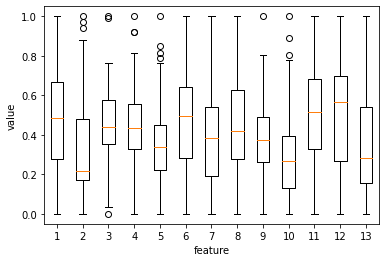

In [ ]:
plt.boxplot(X_train_norm[:])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

      이처럼 [0~1]범위 내로 모든 데이터 특성들의 스케일을 맞춘 것을 볼 수 있다.

#### **[03-02] 표준화 (Standardization)**
      표준화는 많은 머신러닝 알고리즘, 특히 최적화 알고리즘(ex.경사하강법)에서 널리 사용되는 방식이다.
      특성의 평균을 0으로 맞추고 표준편차를 1로 만들어 정규분포와 같이 만들기 때무에 가중치를 더 쉽게 학습할 수 있음뿐만 아니라 이상치 정보가 유지되어 이상치에 덜 민감하다.

⚡ **공식**

$x_{std} = \frac{x_{i}-\mu_{x}}{σ_{x}}$

      공식은 특성 값에 평균을 빼고, 표준편차로 나눈 것이다.


      이 또한 위와 같이 적용하여 확인해보자

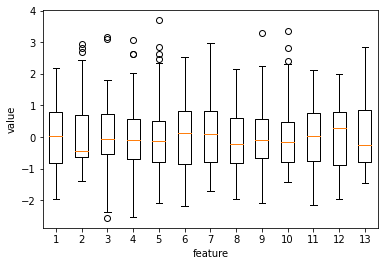

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

plt.boxplot(X_train_std[:])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

        표준화된 값을 보면 값의 제한이 따로 없지만 역시나 잘 적용된 모습을 볼 수 있다.

#### **[03-03] RobustScaler**
      sklearn에서 특성 스케일을 조정하는 다른 좋은 방법 중 하나로 RobustScaler

      RobustScaler는 특성 열마다 독립적으로 작용하며, 중간 값을 뺀 다음 데이터셋의 1사분위수와 3사분위수(25, 75 백분위수)를 사용해 데이터셋의 스케일을 조정한다.

⚡ **공식**

$x_{robust} = \frac{x_{i}-q_{2}}{q_{3}-q_{1}}$

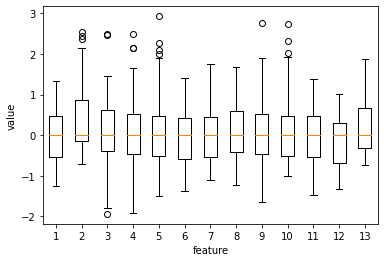

In [ ]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
X_train_robust = rbs.fit_transform(X_train)
X_test_robust = rbs.transform(X_test)

plt.boxplot(X_train_robust[:])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

#### **[03-04] MaxAbsScaler**

    MaxAbsScaler는 각 특성별로 데이터를 최대 절대값으로 나누어 [-1 ~ +1]사이의 범위로 특성을 조정하는 방법이다. 즉, 각 특성의 최대 값은 1이다.
    최소-최대 스케일링 방식과 비슷하지만 음수/양수값에 따른 대칭분포를 유지하게 된다는 특징이 있다.
    

⚡ **공식**

$x_{maxabs} = \frac{x_{i}}{|x_{max}|}$

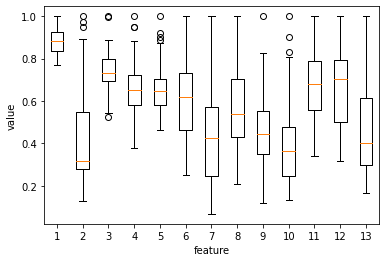

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
X_train_maxabs = mas.fit_transform(X_train)
X_test_maxabs = mas.transform(X_test)

plt.boxplot(X_train_maxabs[:])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

        만약 샘플 내 음수가 있었다면, [-1 ~ 0]의 범위로 나왔을 것이다.

##### **MaxAbsScaler와 희소행렬**
        희소행렬은 행렬 대부분의 값이 0인 경우를 말하는 표현이다.
        MaxAbsScaler는 데이터를 중앙에 맞추는 방식이 아니기 때문에 희소행렬을 사용할 수 있다.
         
        다만, RobustScaler는 훈련은 불가능하지만 변환까지는 가능하다.
        또한, StandardScaler는 with_mean=False로 지정하면 사용가능하다.

##### **[0~5]의 값을 이용해 특성 스케일 조정 방법들의 적용 결과 차이를 확인해보자**

In [ ]:
# 수식을 직접 적용
ex = np.array([0, 1, 2, 3, 4, 5])
print('정규화: ', (ex - ex.min())/(ex.max()-ex.min()))
print('표준화: ', (ex- ex.mean())/ex.std())
print('robust: ', (ex-np.percentile(ex, 50)) / (np.percentile(ex, 75) - np.percentile(ex, 25)))
print('maxabs: ', ex / np.max(np.abs(ex)))

정규화:  [0.  0.2 0.4 0.6 0.8 1. ]
표준화:  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
robust:  [-1.  -0.6 -0.2  0.2  0.6  1. ]
maxabs:  [0.  0.2 0.4 0.6 0.8 1. ]


In [ ]:
# 라이브러리를 통해 함수로 적용
from sklearn.preprocessing import scale, minmax_scale, robust_scale, maxabs_scale
print('MinMaxScaler:', minmax_scale(ex))
print('StandardScaler:', scale(ex))
print('RobustScaler:', robust_scale(ex))
print('MaxAbsScaler:', maxabs_scale(ex))

MinMaxScaler: [0.  0.2 0.4 0.6 0.8 1. ]
StandardScaler: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
RobustScaler: [-1.  -0.6 -0.2  0.2  0.6  1. ]
MaxAbsScaler: [0.  0.2 0.4 0.6 0.8 1. ]


#### **[03-05] Normalizer (고난도)**

      Normalizer의 normalize()함수는 특성이 아닌 샘플별로 정규화를 수행한다.
      희소행렬도 처리가능하며, 기본적으로 각 샘플의 L2노름이 1이 되도록 정규화한다.
      
      특성 벡터의 모든 길이가 1이 되도록 조정하는 것으로, 반지름 1인 원에 투영하는 느낌이다.
      특성 벡터의 길이는 상관없고, 데이터의 방향이나 각도가 중요할 경우 사용한다. (범주형 벡터 전처리)
      
      Normalizer를 하게되면 구형 윤곽을 가지게 되어 더 빠르게 학습할 수 있으며, 과대적합 확률을 낮출 수 있다.

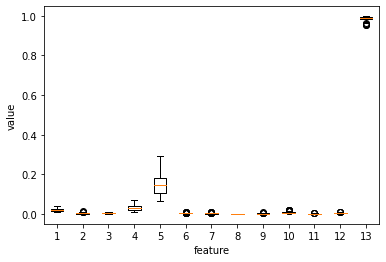

In [ ]:
from sklearn.preprocessing import Normalizer
nrm = Normalizer()
X_train_l2 = nrm.fit_transform(X_train)

plt.boxplot(X_train_l2[:])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

      위의 [0~5] 범위의 샘플인 ex 배열을 통해 Normalizer에도 적용할 것이다.
      Normalizer 클래스의 norm 매개변수에 노름을 지정할 수 있는데, [l2,l1,max]가 있다.
      
      해당 노름들에 대한 변화를 ex 배열을 통해서 print 형식으로 적용해보자.
      다만, 두 배열을 위에서 아래로 붙이는 numpy의 vstack을 통해 한 행을 추가하고 0의 나눗셈 오류를 방지하고자 편의상 0을 제거하고 진행할 것이다.

In [ ]:
ex_2f = np.vstack((ex[1:], ex[1:]**2))   # 제곱의 값으로 한 행을 더 추가
ex_2f

array([[ 1,  2,  3,  4,  5],
       [ 1,  4,  9, 16, 25]])

In [ ]:
l2_norm = np.sqrt(np.sum(ex_2f ** 2, axis = 1))
l1_norm = np.sum(np.abs(ex_2f), axis=1)
max_norm = np.max(np.abs(ex_2f), axis=1)

print('Normalizer(norm = l2) :', ex_2f / l2_norm.reshape(-1,1))
print('Normalizer(norm = l1) :', ex_2f / l1_norm.reshape(-1,1))
print('Normalizer(norm = max) :', ex_2f / max_norm.reshape(-1,1))

Normalizer(norm = l2) : [[0.13483997 0.26967994 0.40451992 0.53935989 0.67419986]
 [0.03196014 0.12784055 0.28764125 0.51136222 0.79900347]]
Normalizer(norm = l1) : [[0.06666667 0.13333333 0.2        0.26666667 0.33333333]
 [0.01818182 0.07272727 0.16363636 0.29090909 0.45454545]]
Normalizer(norm = max) : [[0.2  0.4  0.6  0.8  1.  ]
 [0.04 0.16 0.36 0.64 1.  ]]


#### **[03-06] 그 외 최신 2가지 방법**

        [QuantileTransformer]
        1000개의 분위를 사용해 데이터를 균등분포시키는 방식.
        이상치에 민감하지 않고, [0~1]로 압축됨.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (124). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


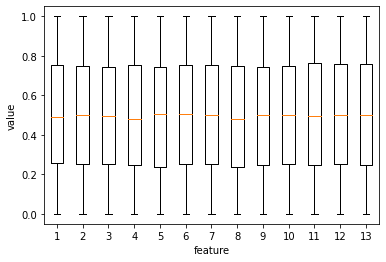

In [ ]:
from sklearn.preprocessing import QuantileTransformer
qtr = QuantileTransformer()
qtr.fit(X_train)
X_train_qtr = qtr.transform(X_train)
X_test_qtr = qtr.transform(X_test)

plt.boxplot(X_train_qtr[:])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

        [PowerTransformer]
        데이터의 특성별로 정규분포형태에 가깝게 변환한다.
        

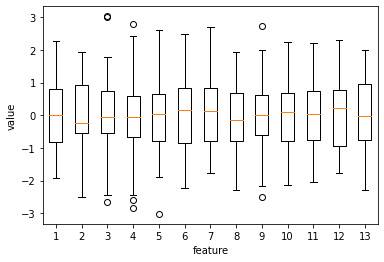

In [ ]:
from sklearn.preprocessing import PowerTransformer
ptr = PowerTransformer()
ptr.fit(X_train)
X_train_ptr = ptr.transform(X_train)
X_test_ptr = ptr.transform(X_test)

plt.boxplot(X_train_ptr[:])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

---
### [04] **유용한 특성 고르기**

        테스트 데이터셋보다 훈련 데이터셋이 성능이 훨씬 높으면 "과대적합"을 해결해야한다는 신호이다.
        과대적합은 모델 파라미터가 훈련 데이터셋에 있는 특정 샘플들에 대해 너무 가깝게 맞춰있다는 것이다.

        과대적합을 막는 방법은 4가지 정도 있다.
          1. 더욱 많은 훈련 데이터를 사용
          2. 파라미터가 적은 간단한 모델 (파라미터 : 매개변수)
          3. 규제를 통한 복잡도 제어
          4. 데이터의 차원축소

        여기서 1, 2번의 방법은 불가능할 경우가 존재하기에 3, 4번 규제와 차원축소에 대해서 알아보자.
      

#### **[04-01] 규제를 통한 복잡도 제어**

      "[03] Various machine learning algorithms using Sklearn"의 "[2] Logistic Regression"파트에서 규제에 대해서 다루었다. (참고)

      L2 규제와 L1 규제를 기하학적인 해석을 통해서 조금 더 알아보자

⚡ **L2 규제 (Lasso 2 Regression)**

$\left\|w \right\|_{2}^{2} = \sum_{j=1}^{m}w_{j}^{2}$

      L2 규제는 손실함수 가중치에 대한 L2 norm의 제곱을 더하는 방식이다.

      L2 규제는 각 가중치의 제곱을 더하기 때문에 원모양의 페널티로 그리게 된다. (w1^2 + w2^2)
      (아달린에서 사용된 가중치가 2개인 제곱오차합(SSE) 비용함수의 등고선을 배경으로 그렸다) 

In [ ]:
Image(url='https://git.io/JtY8L', width=300) 

        페널티가 원 모양으로 제한범위를 가지기 때문에 절충점을 최소비용점과 가장 가까운 지점으로 할 수 있다.
        하지만 규제 파라미터인 람다(lamda)가 커지게 되면 페널티 비용이 빠르게 증가해 원을 점점 작게 만든다.

        즉, L2에 대한 우리는 절충점을 찾기 위해 규제가 없는 비용과 페널티항의 합을 최소화 하는 것이 목표가 될 것이다.

⚡ **L1 규제 (Lasso 1 Regression)**

$\left\|w \right\|_{1}^{} = \sum_{j=1}^{m}\left| w_{j}\right|$

      L1 규제는 손실함수에 가중치의 절대값(L1 norm)을 더하는 방식이다.
      
      L1 규제는 가중치 절댓값의 합이기 때문에 L1 페널티가 다이아몬드 모양의 제한범위를 그리게 된다.
      (아달린에서 사용된 가중치가 2개인 제곱오차합(SSE) 비용함수의 등고선을 배경으로 그렸다)


In [ ]:
Image(url='https://git.io/JtY8t', width=300) 

        L1 다이아몬드와 비용함수의 등고선이 w_1 = 0일 때, 절충점이 꼭지점으로 가게되는 모습을 볼 수 있다.
        즉, 최적점은 축에 가깝게 위치할 가능성이 높아 희소성이 나타나는 이유이다.

        "희소성"이란 관련없는 데이터가 많은 상태라고 할 수 있다. 
        희소행렬도 행렬 내 데이터가 0이 많은 행렬을 의미하는 것처럼 데이터 내 희소성이라하면 관련없는 데이터가 많은 상태를 말한다.

        다시 위 그래프를 보면 w2 꼭지점에 절충점이 가게 된다면 w1이 0일때를 의미하기 때문에 w1을 사용하지 않아 불필요한 값이 되버리는데, 이렇게 되어 희소성이 나타나는 것이다.


###### ❗**(참고) L1 규제의 기법**
      앞서 말한 희소성의 특징으로 L1규제는 보통 대부분의 특성 가중치가 0이 되기 때문에 희소한 특성 벡터를 만든다.

      이는 실제 관련없는 특성이 많은 고차원 데이터셋에서 사용하면 좋은 기법이 되기도 한다.
      특히 훈련 샘플보다 관련없는 특성이 더 많은 경우 L1 규제는 특성 선택에 기법이 될 수도 있다.

##### ⚡ **추가 예제 : 규제 강도를 달리하여 특성의 가중치 변화 그래프**

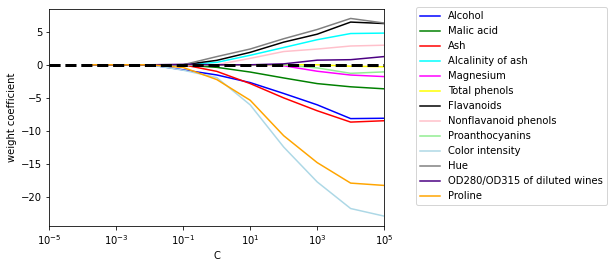

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
# c 값(규제)을 달리하면서 그래프로 확인
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

        C (규제 파라미터 𝜆의 역수)가 커질수록 규제가 낮아지는 것을 볼 수 있다.

#### **[04-02] 차원축소 (Dimensionality)**

        "차원의 저주(curse of dimensionality)"
           : 차원이 증가하면 그 것을 표현하기 위한 데이터 양이 기하급수적으로 증가한다. 
           : 특성(feature)이 너무 많아지면, 훈련의 속도가 느려지거나 좋은 솔루션에 때론 방해가 되기도 한다.

        즉, 너무 고차원의 데이터들은 의미를 제대로 표현하기 어렵다는 문제가 생기게 된다. 이를 차원축소를 통해서 해결한다.

        "[05] Data compression through dimension reduction" 에서 차원 축소 대해 자세히 다시 다룸

##### **[04-02-01] 차원의 저주**

      

In [ ]:
Image(url='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdrGHoh%2FbtqVSu7nT1W%2FOvEULafM3kC7p3gzbfnQ81%2Fimg.png', width=500)

    ⏩ 차원의 저주의 이해
        
        우선 예시로 차원 내 임의의 점을 선택하고 해당 점이 경계선과 0.001 이내로 가까울 확률을 비교한다고 가정하자.

        2차원에서는 0.4%밖에 되지 않는 확률이 10000차원에서는 99.99999%로 증가한다.
        간단하게 차원이 늘어날 수록 경계선이 늘어나기 때문에 그렇게 된다고 생각할 수 있다.

        이처럼 고차원의 데이터셋은 차원이 높아 공간이 더 넓기 때문에 보통 데이터끼리 멀리 떨어져있다고 유추한다.
        그럼 예측을 위한 더 많은 추측이 요구되어 불안해지게 될 것이다.

        이를 해결하기 위해서 이론적 해결법은
          "고차원에서도 데이터끼리의 거리가 가까울 수 있도록 밀도가 높아질 때까지 DataSet의 크기를 키움" 인데, 
          이러한 방법은 사실상 현실적으로 불가능하다.
        

##### **[04-02-02] 차원 축소 방식**

1. **특성 선택 기법 (feature selection)**
        : 원본 특성에서 일부를 선택하는 기법
        : 전통적인 방식으로 순차 특성 선택 알고리즘이 대표적

2. **특성 추출 기법 (feature extraction)**
        : 일련의 특성에서 얻은 정보로 새로운 특성을 만드는 기법
        : 데이터셋을 저차원 특성 부분 공간으로 압축하는 기술
        : [05] Data compression through dimension reduction 참고

      

##### **⚡ 특성 선택 알고리즘**
    목적 : 주어진 문제에 가장 관련이 높은 특성 부분 집합을 자동으로 선택하는 것
    특징 : 관계없는 특성이나 잡음을 제거해 계산 효율성을 높이고 모델의 일반화 오차를 줄임
         : 규제를 제공하지 않는 알고리즘에서 유용

    1) 전진 선택법 : 최선의 선택을 진행 (선택을 늘려가는 기법)
    2) 후진 선택법 : 전체특성으로 시작하여 하나의 특성을 뺏을 때의 손해가 적은 특성을 선택 (선택을 줄여가는 기법)

    ⭕ 전통적인 순차 특성 선택 알고리즘은 : 순차 후진 선택 (Sequential Backward Selection, SBS) 이다.
    ⭕ SBS 알고리즘 : 새로운 특성의 부분 공간이 목표하는 특성 개수가 될때까지 전체 특성에서 순차적으로 특성을 제거하는 방식

In [ ]:
# SBS 알고리즘은 sklearn에 없어 직접 구현

from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            # combinations(리스트, 묶을 개수) 
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

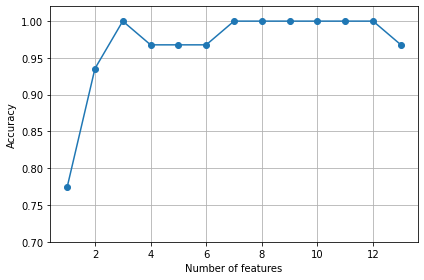

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# 특성을 선택합니다
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# 선택한 특성의 성능을 출력합니다
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

        특성 개수가 줄어들 수록 검증 데이터셋에서 KNN 분류기의 정확도가 향상되는 것을 볼 수 있다. (차원의 저주가 감소)
        
        k = [3,7,8,9,10,12]에서 분류기가 정확도 100%를 달성하였다.

        그럼 'k=3'에서 얼마나 높은 검증 데이터 성능을 내는 특성을 확인해보자

In [ ]:
# sbs.subsets_속성의 11번째 위치에 있는 세개의 특성에 대한 열 인덱스를 얻는 코드
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [ ]:
# 일반 KNN 분류기 성능 측정
knn.fit(X_train_std, y_train)
print('훈련 정확도:', knn.score(X_train_std, y_train))
print('테스트 정확도:', knn.score(X_test_std, y_test))

훈련 정확도: 0.967741935483871
테스트 정확도: 0.9814814814814815


In [ ]:
# 선택된 세 개의 특성에서 KNN 분류기 성능 측정
knn.fit(X_train_std[:, k3], y_train)
print('훈련 정확도:', knn.score(X_train_std[:, k3], y_train))
print('테스트 정확도:', knn.score(X_test_std[:, k3], y_test))

훈련 정확도: 0.9516129032258065
테스트 정확도: 0.9259259259259259


        Wine 데이터셋에 있는 원본 특성의 1/4도 되지 않는 적은 특성을 사용했지만 정확도의 감소율은 작다.
        이는 세 개의 특성에 담긴 판별 정보가 원래 데이터셋보다 적지 않다는 뜻이다.

        ⚡결론⚡
        (SBS 알고리즘을 통해) 특성 개수를 줄였을 때, KNN 모델의 성능에는 큰 변화는 없으나, 데이터셋의 크기를 줄인 것을 알 수 있다.
        그럼 "모든 특성을 사용한 KNN 모델"보다 "특성 축소가 적용된 KNN 모델"이 거의 같은 성능과 결과이지만, 간단하고 가벼운 모델이며, 해석도 쉽다.

#### **[04-03] 랜덤포레스트의 특성 중요도를 적용**
      결정트리와 랜덤포레스트는 특성 중요도를 계산할 수 있다.
      "특성 중요도" : 트리를 분할할 때 사용한 특성들이 불순도 감소를 얼마나 기여했는지를 계산

      먼저 wine_dataset으로 트리를 계산시키고 중요도 값을 추가해 feature_importances를 저장해서 역순으로 정렬해 확인해볼 것이다.

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


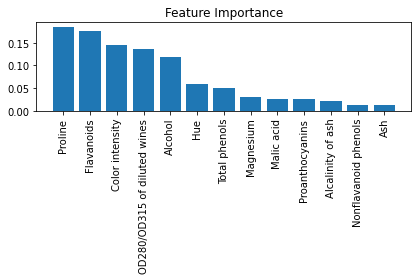

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_ # feature_importances : 각 특성에 중요도 값이 들어있음
indices = np.argsort(importances)[::-1] # 역순으로 정렬

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

        Wine 데이터셋 특성의 상대적 중요도에 따른 순위를 그래프로 그리도록 코드를 작성하여 해당 결과를 도출하였다. (특성 중요도 전체 합은 1)

        500개의 결정 트리에서 평균적 불순도 감소를 기반으로 해당 데이터셋에서 가장 판별력이 좋은 특성은 
        Proline, Flavanoids, Color intensity, OD280/OD315 of diluted wines, Alcohol로 결과가 나왔다.
        
        앞서 SBS 알고리즘에서 알아본 특성 중요도 3개의 클래스는
         OD280/OD315 of diluted wines, Alcohol, Malic acid로 트리 결과에서도 같은 특성이 선택된 것을 알 수 있다.                    

        다만 결정 트리의 특성 중요도가 조금 더 좋은 결과를 도출한다는 것이다.